# Gold & Silver Price Analysis and Forecasting

The goal of is project is to:
1. Download gold and silver price data using yFinance
2. Create some useful features from the price data
3. Visualize the prices and trends
4. Train a simple machine learning model to predict prices

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Make sure we can see all columns
pd.set_option('display.max_columns', 50)

print('Libraries imported successfully!')

Libraries imported successfully!


## Step 2: Download Price Data

We'll use yFinance to download gold and silver futures prices.

The tickers used are:
- Gold: 'GC=F'
- Silver: 'SI=F'
- Date Range: '2025-01-01' to '2026-01-09'
- Interval: '1d' (daily data)

Gold and Silver futures are used for analysis. They provide a more accurate representation of market prices compared to spot prices. 

The difference between futures and spot prices can be significant due to factors like storage costs, interest rates, and market expectations.

Additionally, futures prices are often more liquid and reflect market sentiment better than spot prices, making them preferable for analysis and forecasting in financial markets.
Spot prices can be more volatile and may not capture the full market dynamics, especially for commodities like gold and silver that are influenced by various economic factors.

In [2]:
# Define what we want to download
tickers = ['GC=F', 'SI=F']  # Gold and Silver futures
start_date = '2025-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')  # Today's date

print(f"Downloading data from {start_date} to {end_date}")

# Download the data
raw_data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# Get just the closing prices
prices = raw_data['Close'].copy()

# Rename columns to be clearer
prices.columns = ['GOLD', 'SILVER']

print(f"Downloaded {len(prices)} days of data")
prices.head()

Downloaded 262 days of data


,GOLD,SILVER
Date,,
2025-01-02,2658.899902,29.622000
2025-01-03,2645.000000,29.806000
2025-01-06,2638.399902,30.341999
2025-01-07,2656.699951,30.447001
2025-01-08,2664.500000,30.452000


In [3]:
raw_data.head()

Price             Close                    High                     Low  \
Ticker             GC=F       SI=F         GC=F       SI=F         GC=F   
Date                                                                      
2025-01-02  2658.899902  29.622000  2663.100098  29.715000  2633.000000   
2025-01-03  2645.000000  29.806000  2658.699951  30.080000  2641.800049   
2025-01-06  2638.399902  30.341999  2647.000000  30.459999  2617.300049   
2025-01-07  2656.699951  30.447001  2657.500000  30.447001  2653.000000   
2025-01-08  2664.500000  30.452000  2676.899902  30.650000  2653.500000   

Price                         Open            Volume       
Ticker           SI=F         GC=F       SI=F   GC=F SI=F  
Date                                                       
2025-01-02  29.260000  2633.000000  29.260000   1728  307  
2025-01-03  29.806000  2658.699951  30.080000    591   91  
2025-01-06  29.959999  2645.500000  30.370001    960  186  
2025-01-07  30.447001  2653.399902  30.447001    643    6  
2025-01-08  30.280001  2655.500000  30.525000    999   46

## Step 3: Create Features

Now we'll create some useful features (also called "technical indicators") that might help us predict future prices.

**Features we'll create:**
- **Daily Return**: How much the price changed today (in percentage)
- **Moving Average (MA)**: Average price over the last N days
- **Volatility**: How much the price has been jumping around lately
- **RSI**: A measure of momentum (whether the price is rising or falling)

Gold and silver prices are represented in US dollars per ounce (USD/oz) in the dataset

In [4]:
# Create a copy to add features
df = prices.copy()

# For each asset (Gold and Silver), create features
for asset in ['GOLD', 'SILVER']:
    
    # Daily return (percentage change from yesterday)
    df[f'{asset}_return'] = df[asset].pct_change() * 100
    
    # 10-day moving average
    df[f'{asset}_ma10'] = df[asset].rolling(window=10).mean()
    
    # 20-day moving average
    df[f'{asset}_ma20'] = df[asset].rolling(window=20).mean()
    
    # 20-day volatility (standard deviation of returns)
    df[f'{asset}_volatility'] = df[asset].pct_change().rolling(window=20).std() * 100

# Gold/Silver ratio (how many ounces of silver = 1 ounce of gold)
df['gold_silver_ratio'] = df['GOLD'] / df['SILVER']

print("Features created!")
print(f"Total columns: {len(df.columns)}")
df.tail()

Features created!
Total columns: 11


,GOLD,SILVER,GOLD_return,GOLD_ma10,GOLD_ma20,GOLD_volatility,SILVER_return,SILVER_ma10,SILVER_ma20,SILVER_volatility,gold_silver_ratio
Date,,,,,,,,,,,
2026-01-09,4490.299805,78.884003,0.912412,4417.270020,4391.295020,1.486668,5.578456,75.183501,70.493101,5.493605,56.922819
2026-01-12,4604.299805,84.610001,2.538806,4424.789990,4407.235010,1.515387,7.258757,75.995901,71.527151,5.559874,54.417915
2026-01-13,4589.200195,85.876999,-0.327946,4451.200000,4421.690015,1.523432,1.497457,77.598001,72.752901,5.403462,53.439224
2026-01-14,4626.299805,90.869003,0.808411,4476.819971,4437.669995,1.526316,5.812970,78.947501,74.149351,5.474891,50.911748
2026-01-15,4616.299805,91.875999,-0.216155,4505.889941,4453.259985,1.529155,1.108184,81.121701,75.608151,5.450930,50.244893


In [5]:
# Remove rows with missing values (first few rows will have NaN because of rolling calculations)
df_clean = df.dropna()

print(f"Rows before cleaning: {len(df)}")
print(f"Rows after cleaning: {len(df_clean)}")

df_clean.head()

Rows before cleaning: 262
Rows after cleaning: 242


,GOLD,SILVER,GOLD_return,GOLD_ma10,GOLD_ma20,GOLD_volatility,SILVER_return,SILVER_ma10,SILVER_ma20,SILVER_volatility,gold_silver_ratio
Date,,,,,,,,,,,
2025-01-31,2812.500000,32.127998,-0.371945,2771.620044,2726.150012,0.840078,-0.729206,31.190800,30.8951,1.818413,87.540468
2025-02-03,2833.899902,32.391998,0.760885,2780.580029,2735.595007,0.824035,0.821713,31.334900,31.0244,1.820118,87.487653
2025-02-04,2853.300049,32.888000,0.684574,2790.410034,2746.340015,0.814761,1.531249,31.492600,31.1517,1.810526,86.758088
2025-02-05,2871.600098,32.856998,0.641364,2800.810034,2757.085022,0.813838,-0.094266,31.654399,31.2722,1.814137,87.396909
2025-02-06,2856.000000,32.518002,-0.543255,2810.100024,2766.660022,0.840292,-1.031734,31.838900,31.3755,1.840662,87.828276


## Step 4: Visualize the Data

Let's create some charts to understand our data better.

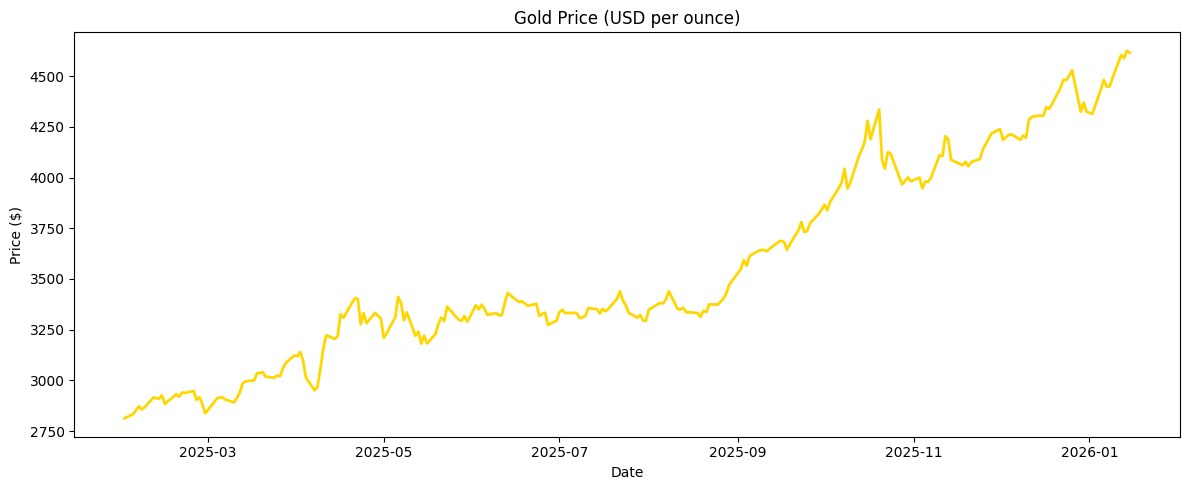

In [23]:
# Gold Price Chart
plt.figure(figsize=(12, 5))
plt.plot(df_clean.index, df_clean['GOLD'], color='gold', linewidth=2)
plt.title('Gold Price (USD per ounce)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

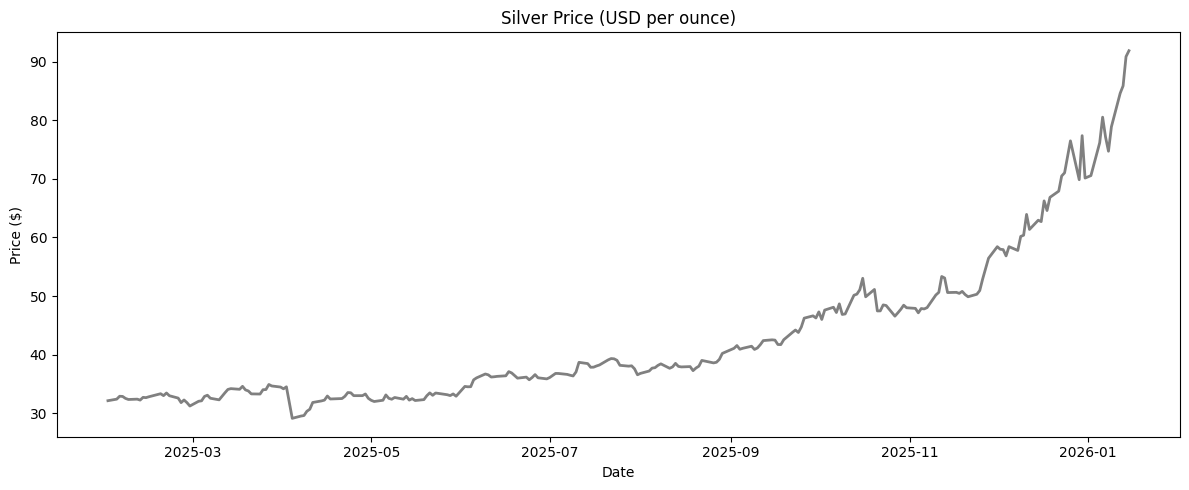

In [6]:
# Silver Price Chart
plt.figure(figsize=(12, 5))
plt.plot(df_clean.index, df_clean['SILVER'], color='gray', linewidth=2)
plt.title('Silver Price (USD per ounce)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

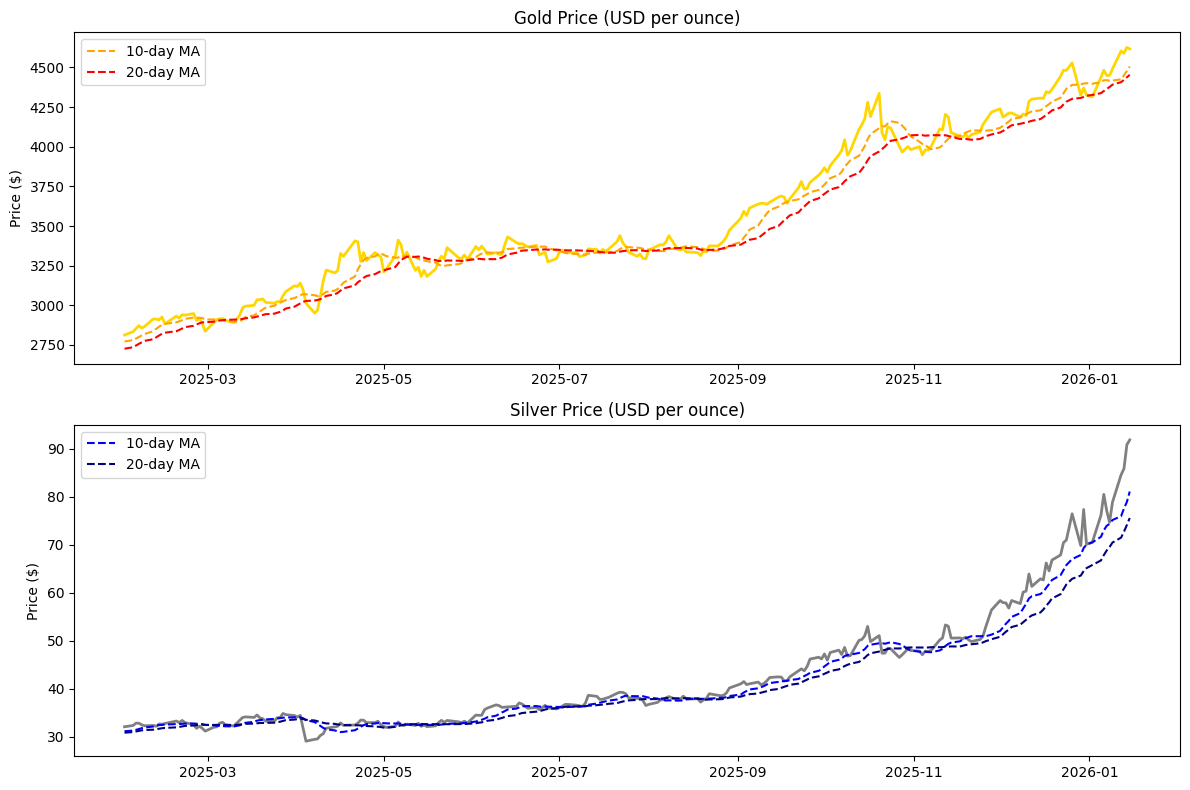

In [7]:
# Plot Gold and Silver prices
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Gold price
axes[0].plot(df_clean.index, df_clean['GOLD'], color='gold', linewidth=2)
axes[0].plot(df_clean.index, df_clean['GOLD_ma10'], color='orange', linestyle='--', label='10-day MA')
axes[0].plot(df_clean.index, df_clean['GOLD_ma20'], color='red', linestyle='--', label='20-day MA')
axes[0].set_title('Gold Price (USD per ounce)')
axes[0].set_ylabel('Price ($)')
axes[0].legend()

# Silver price
axes[1].plot(df_clean.index, df_clean['SILVER'], color='gray', linewidth=2)
axes[1].plot(df_clean.index, df_clean['SILVER_ma10'], color='blue', linestyle='--', label='10-day MA')
axes[1].plot(df_clean.index, df_clean['SILVER_ma20'], color='navy', linestyle='--', label='20-day MA')
axes[1].set_title('Silver Price (USD per ounce)')
axes[1].set_ylabel('Price ($)')
axes[1].legend()

plt.tight_layout()
plt.show()

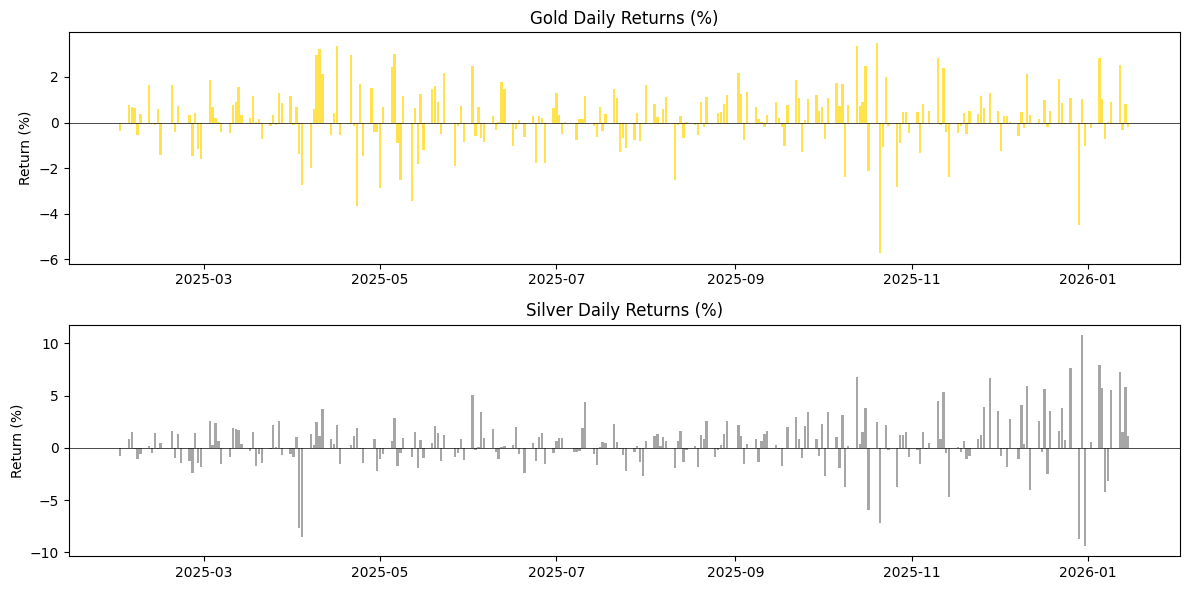

In [8]:
# Plot daily returns
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

axes[0].bar(df_clean.index, df_clean['GOLD_return'], color='gold', alpha=0.7)
axes[0].set_title('Gold Daily Returns (%)')
axes[0].set_ylabel('Return (%)')
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

axes[1].bar(df_clean.index, df_clean['SILVER_return'], color='gray', alpha=0.7)
axes[1].set_title('Silver Daily Returns (%)')
axes[1].set_ylabel('Return (%)')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

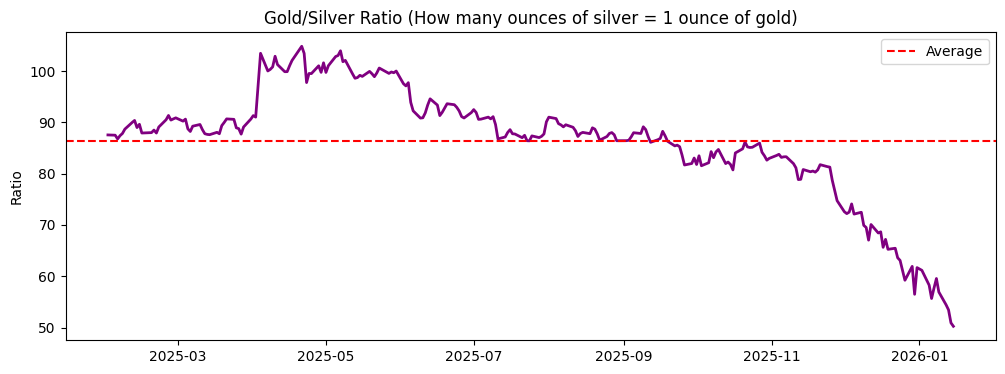

In [9]:
# Gold/Silver ratio over time
plt.figure(figsize=(12, 4))
plt.plot(df_clean.index, df_clean['gold_silver_ratio'], color='purple', linewidth=2)
plt.title('Gold/Silver Ratio (How many ounces of silver = 1 ounce of gold)')
plt.ylabel('Ratio')
plt.axhline(y=df_clean['gold_silver_ratio'].mean(), color='red', linestyle='--', label='Average')
plt.legend()
plt.show()

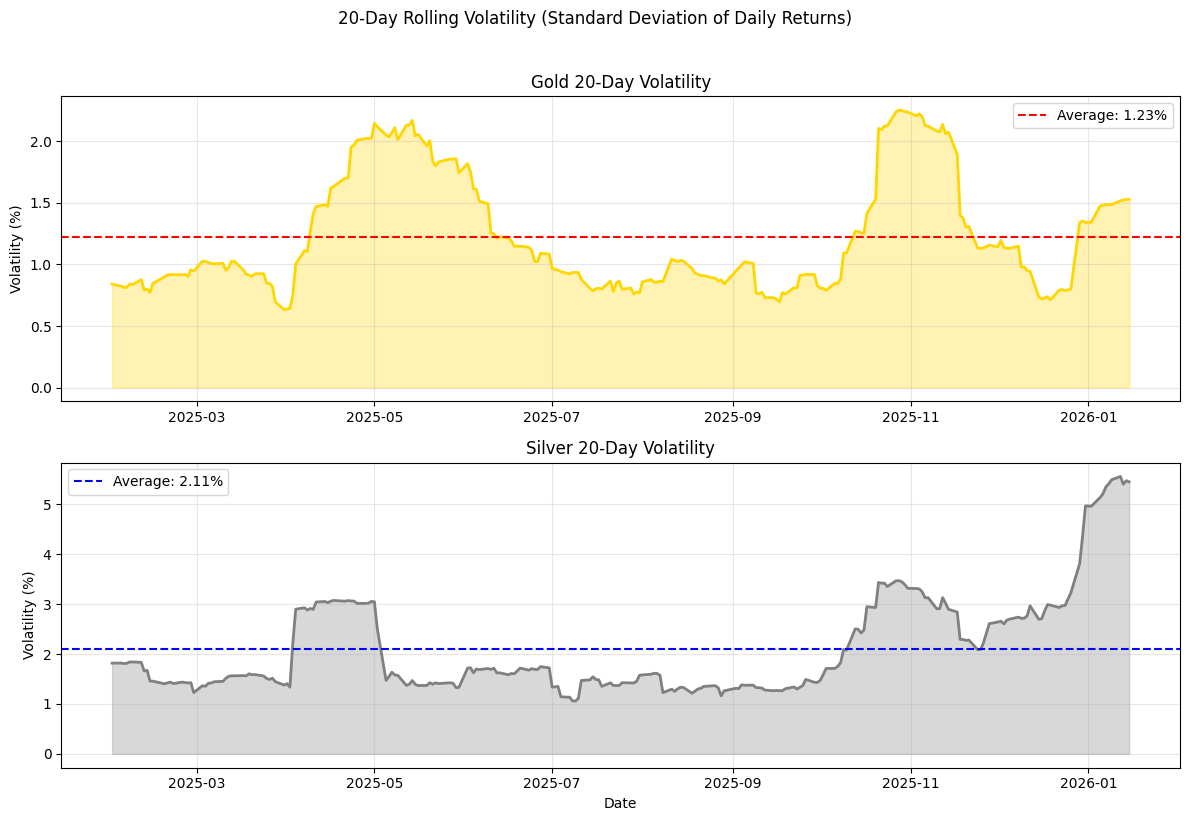

Volatility Statistics:

Gold 20-Day Volatility:
  Min: 0.63%
  Max: 2.25%
  Average: 1.23%

Silver 20-Day Volatility:
  Min: 1.06%
  Max: 5.56%
  Average: 2.11%


In [10]:
# Plot 20-day Volatility for Gold and Silver
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Gold volatility
axes[0].plot(df_clean.index, df_clean['GOLD_volatility'], color='gold', linewidth=2)
axes[0].axhline(y=df_clean['GOLD_volatility'].mean(), color='red', linestyle='--', label=f'Average: {df_clean["GOLD_volatility"].mean():.2f}%')
axes[0].fill_between(df_clean.index, 0, df_clean['GOLD_volatility'], alpha=0.3, color='gold')
axes[0].set_title('Gold 20-Day Volatility')
axes[0].set_ylabel('Volatility (%)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Silver volatility
axes[1].plot(df_clean.index, df_clean['SILVER_volatility'], color='gray', linewidth=2)
axes[1].axhline(y=df_clean['SILVER_volatility'].mean(), color='blue', linestyle='--', label=f'Average: {df_clean["SILVER_volatility"].mean():.2f}%')
axes[1].fill_between(df_clean.index, 0, df_clean['SILVER_volatility'], alpha=0.3, color='gray')
axes[1].set_title('Silver 20-Day Volatility')
axes[1].set_ylabel('Volatility (%)')
axes[1].set_xlabel('Date')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('20-Day Rolling Volatility (Standard Deviation of Daily Returns)', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

# Print volatility statistics
print("Volatility Statistics:")
print(f"\nGold 20-Day Volatility:")
print(f"  Min: {df_clean['GOLD_volatility'].min():.2f}%")
print(f"  Max: {df_clean['GOLD_volatility'].max():.2f}%")
print(f"  Average: {df_clean['GOLD_volatility'].mean():.2f}%")

print(f"\nSilver 20-Day Volatility:")
print(f"  Min: {df_clean['SILVER_volatility'].min():.2f}%")
print(f"  Max: {df_clean['SILVER_volatility'].max():.2f}%")
print(f"  Average: {df_clean['SILVER_volatility'].mean():.2f}%")

## Step 5: Prepare Data for Machine Learning

Now we'll set up our data to train a simple prediction model.

**Goal:** Predict tomorrow's Gold price using today's features.

In [11]:
# Import machine learning libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Import XGBoost
import xgboost as xgb

print("ML libraries imported!")

ML libraries imported!


In [12]:
# Choose what we want to predict
target = 'GOLD'

# Choose our features (everything except the raw prices)
feature_columns = ['GOLD_return', 'GOLD_ma10', 'GOLD_ma20', 'GOLD_volatility',
                   'SILVER_return', 'SILVER_ma10', 'SILVER_ma20', 'SILVER_volatility',
                   'gold_silver_ratio']

# Create X (features) and y (target)
X = df_clean[feature_columns]
y = df_clean[target]

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeatures we're using: {feature_columns}")

Features (X) shape: (242, 9)
Target (y) shape: (242,)

Features we're using: ['GOLD_return', 'GOLD_ma10', 'GOLD_ma20', 'GOLD_volatility', 'SILVER_return', 'SILVER_ma10', 'SILVER_ma20', 'SILVER_volatility', 'gold_silver_ratio']


In [13]:
# Split data into training and testing sets
# We use 80% for training and 20% for testing
# shuffle=False because this is time series data (order matters!)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    shuffle=False  # Important for time series!
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 193
Testing samples: 49


## Step 6: Train the Model

We'll use Linear Regression - one of the simplest machine learning models.

In [14]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained!")

Model trained!


In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage

print("Model Performance:")
print(f"  RMSE (Root Mean Squared Error): ${rmse:.2f}")
print(f"  R² Score: {r2:.4f}")
print(f"  MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
print("\nInterpretation:")
print(f"  - On average, our predictions are off by about ${rmse:.2f}")
print(f"  - R² of {r2:.2%} means the model explains {r2:.1%} of the price variation")
print(f"  - MAPE of {mape:.2f}% means predictions are off by {mape:.2f}% on average")

Model Performance:
  RMSE (Root Mean Squared Error): $123.94
  R² Score: 0.5025
  MAPE (Mean Absolute Percentage Error): 2.29%

Interpretation:
  - On average, our predictions are off by about $123.94
  - R² of 50.25% means the model explains 50.3% of the price variation
  - MAPE of 2.29% means predictions are off by 2.29% on average


## Step 7: Visualize Predictions

Let's see how well our model did by comparing actual vs predicted prices.

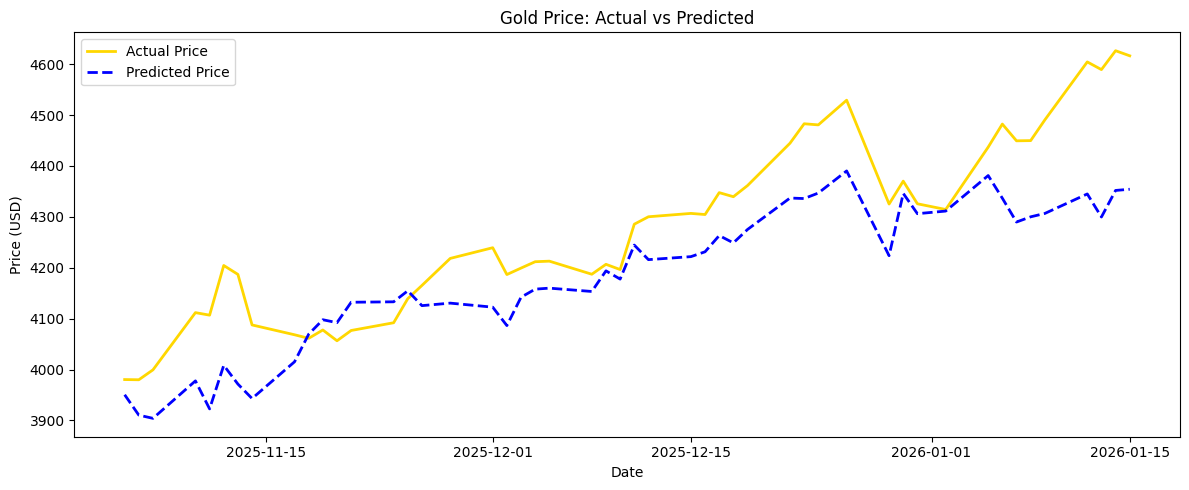

In [16]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 5))

# Get the dates for the test set
test_dates = df_clean.index[-len(y_test):]

plt.plot(test_dates, y_test.values, label='Actual Price', color='gold', linewidth=2)
plt.plot(test_dates, y_pred, label='Predicted Price', color='blue', linestyle='--', linewidth=2)

plt.title('Gold Price: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

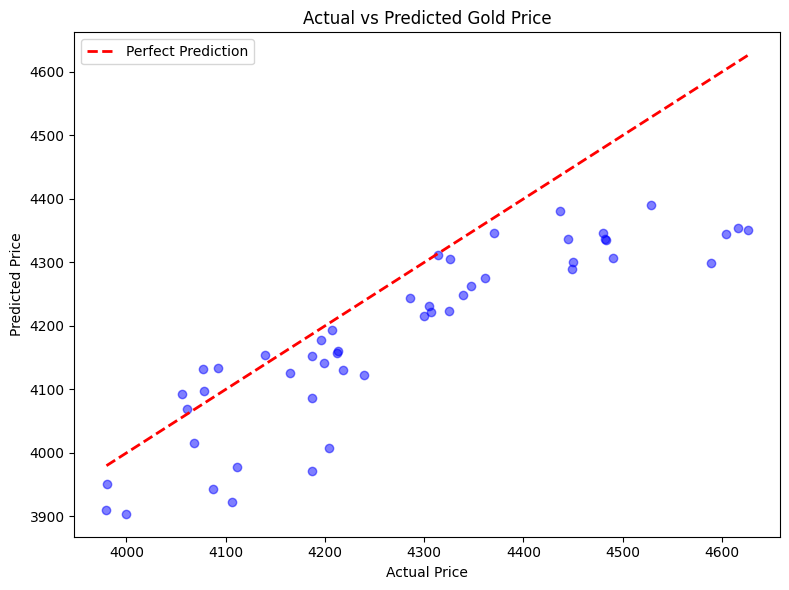

In [17]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Gold Price')
plt.legend()
plt.tight_layout()
plt.show()

## Step 8: Feature Importance

Let's see which features are most important for predicting gold prices.

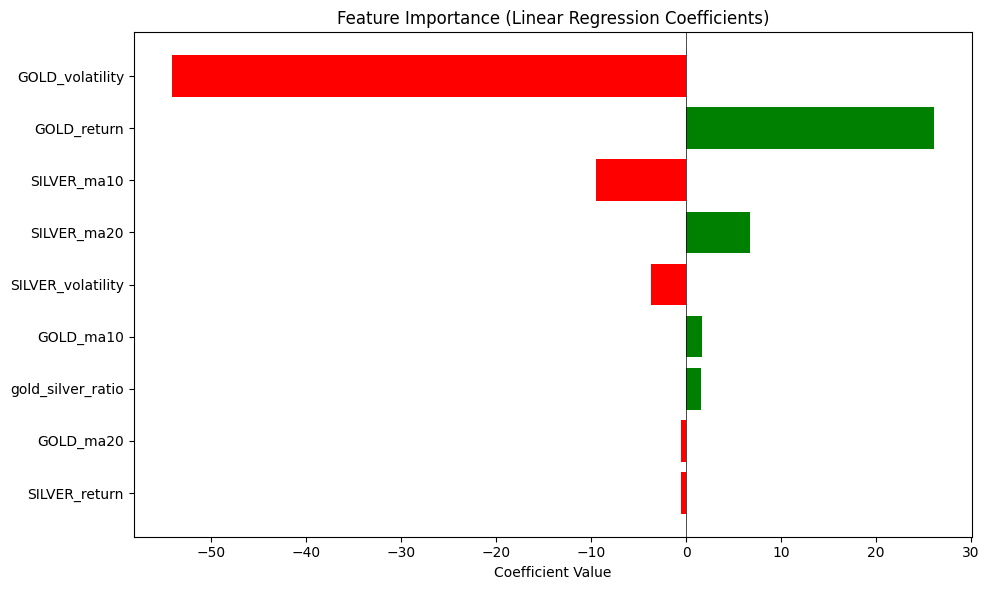

In [18]:
# Get feature importance from the model coefficients
importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': model.coef_
})

# Sort by absolute value of coefficient
importance['Abs_Coefficient'] = abs(importance['Coefficient'])
importance = importance.sort_values('Abs_Coefficient', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in importance['Coefficient']]
plt.barh(importance['Feature'], importance['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

## Step 9: Train Multiple Models Individually

Now let's train different machine learning models individually for both Gold and Silver:
- **Linear Regression**: Simple baseline model
- **Ridge Regression**: Linear regression with regularization (prevents overfitting)
- **Random Forest**: Ensemble of decision trees
- **XGBoost**: Gradient boosting algorithm

In [19]:
# Prepare data for Gold and Silver
X_gold = df_clean[feature_columns]
y_gold = df_clean['GOLD']
X_train_gold, X_test_gold, y_train_gold, y_test_gold = train_test_split(
    X_gold, y_gold, test_size=0.2, shuffle=False
)

X_silver = df_clean[feature_columns]
y_silver = df_clean['SILVER']
X_train_silver, X_test_silver, y_train_silver, y_test_silver = train_test_split(
    X_silver, y_silver, test_size=0.2, shuffle=False
)

# Initialize storage for results and predictions
gold_results = []
gold_predictions = {}
silver_results = []
silver_predictions = {}

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

print(f"Gold - Training samples: {len(X_train_gold)}, Test samples: {len(X_test_gold)}")
print(f"Silver - Training samples: {len(X_train_silver)}, Test samples: {len(X_test_silver)}")

Gold - Training samples: 193, Test samples: 49
Silver - Training samples: 193, Test samples: 49


### Model 1: Linear Regression

Linear Regression is the simplest baseline model. It finds the best linear relationship between features and the target.

# LINEAR REGRESSION - GOLD

In [28]:
print("Linear Regression - Silver \n")

# Create and train the model
lr_gold = LinearRegression()
lr_gold.fit(X_train_gold, y_train_gold)

# Make predictions
lr_gold_pred = lr_gold.predict(X_test_gold)

# Calculate metrics
lr_gold_rmse = np.sqrt(mean_squared_error(y_test_gold, lr_gold_pred))
lr_gold_r2 = r2_score(y_test_gold, lr_gold_pred)
lr_gold_mape = mean_absolute_percentage_error(y_test_gold, lr_gold_pred) * 100

# Cross-validation
lr_gold_cv_scores = cross_val_score(LinearRegression(), X_gold, y_gold, cv=tscv, scoring='neg_root_mean_squared_error')
lr_gold_cv_rmse = -lr_gold_cv_scores.mean()

# Store results
gold_results.append({
    'Model': 'Linear Regression',
    'RMSE ($)': lr_gold_rmse,
    'R²': lr_gold_r2,
    'MAPE (%)': lr_gold_mape,
    'CV RMSE (TimeSeriesSplit)': lr_gold_cv_rmse
})
gold_predictions['Linear Regression'] = lr_gold_pred

print(f"RMSE: ${lr_gold_rmse:.2f}")
print(f"R² Score: {lr_gold_r2:.4f}")
print(f"MAPE: {lr_gold_mape:.2f}%")
print(f"CV RMSE (TimeSeriesSplit): ${lr_gold_cv_rmse:.2f}")

Linear Regression - Silver 

RMSE: $123.94
R² Score: 0.5025
MAPE: 2.29%
CV RMSE (TimeSeriesSplit): $119.52


### Liner Regression - Silver

In [27]:
print("Linear Regression - Silver \n")
# Create and train the model
lr_silver = LinearRegression()
lr_silver.fit(X_train_silver, y_train_silver)

# Make predictions
lr_silver_pred = lr_silver.predict(X_test_silver)

# Calculate metrics
lr_silver_rmse = np.sqrt(mean_squared_error(y_test_silver, lr_silver_pred))
lr_silver_r2 = r2_score(y_test_silver, lr_silver_pred)
lr_silver_mape = mean_absolute_percentage_error(y_test_silver, lr_silver_pred) * 100

# Cross-validation
lr_silver_cv_scores = cross_val_score(LinearRegression(), X_silver, y_silver, cv=tscv, scoring='neg_root_mean_squared_error')
lr_silver_cv_rmse = -lr_silver_cv_scores.mean()

# Store results
silver_results.append({
    'Model': 'Linear Regression',
    'RMSE ($)': lr_silver_rmse,
    'R²': lr_silver_r2,
    'MAPE (%)': lr_silver_mape,
    'CV RMSE (TimeSeriesSplit)': lr_silver_cv_rmse
})
silver_predictions['Linear Regression'] = lr_silver_pred

print(f"RMSE: ${lr_silver_rmse:.2f}")
print(f"R² Score: {lr_silver_r2:.4f}")
print(f"MAPE: {lr_silver_mape:.2f}%")
print(f"CV RMSE (TimeSeriesSplit): ${lr_silver_cv_rmse:.2f}")

Linear Regression - Silver 

RMSE: $9.31
R² Score: 0.4070
MAPE: 9.72%
CV RMSE (TimeSeriesSplit): $3.07


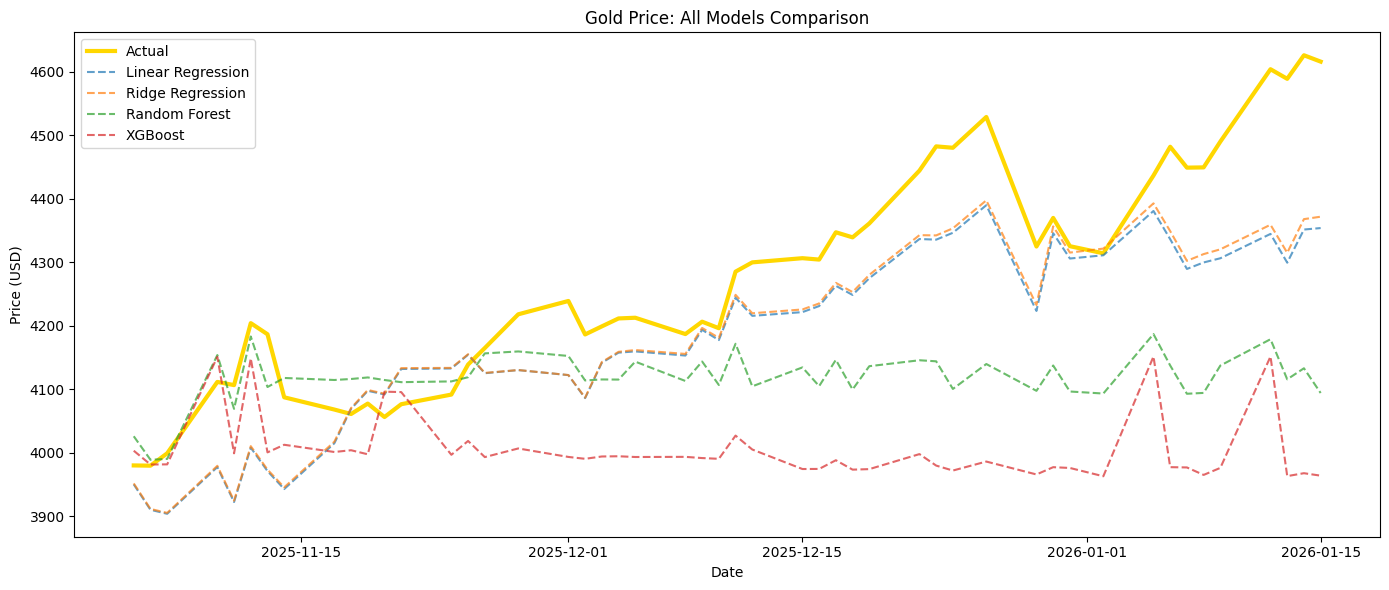

In [ ]:
### Model 2: Ridge Regression

Ridge Regression adds L2 regularization to prevent overfitting. The alpha parameter controls the regularization strength.

### Model 2: Ridge Regression

Ridge Regression adds L2 regularization to prevent overfitting. The alpha parameter controls the regularization strength.

In [29]:
print("Ridge Regression - Gold \n")
# Create and train the model
ridge_gold = Ridge(alpha=1.0)
ridge_gold.fit(X_train_gold, y_train_gold)

# Make predictions
ridge_gold_pred = ridge_gold.predict(X_test_gold)

# Calculate metrics
ridge_gold_rmse = np.sqrt(mean_squared_error(y_test_gold, ridge_gold_pred))
ridge_gold_r2 = r2_score(y_test_gold, ridge_gold_pred)
ridge_gold_mape = mean_absolute_percentage_error(y_test_gold, ridge_gold_pred) * 100

# Cross-validation
ridge_gold_cv_scores = cross_val_score(Ridge(alpha=1.0), X_gold, y_gold, cv=tscv, scoring='neg_root_mean_squared_error')
ridge_gold_cv_rmse = -ridge_gold_cv_scores.mean()

# Store results
gold_results.append({
    'Model': 'Ridge Regression',
    'RMSE ($)': ridge_gold_rmse,
    'R²': ridge_gold_r2,
    'MAPE (%)': ridge_gold_mape,
    'CV RMSE (TimeSeriesSplit)': ridge_gold_cv_rmse
})
gold_predictions['Ridge Regression'] = ridge_gold_pred

print(f"RMSE: ${ridge_gold_rmse:.2f}")
print(f"R² Score: {ridge_gold_r2:.4f}")
print(f"MAPE: {ridge_gold_mape:.2f}%")
print(f"CV RMSE (TimeSeriesSplit): ${ridge_gold_cv_rmse:.2f}")

Ridge Regression - Gold 

RMSE: $117.95
R² Score: 0.5494
MAPE: 2.18%
CV RMSE (TimeSeriesSplit): $97.72


In [30]:
print("Ridge Regression - Silver \n")

# Create and train the model
ridge_silver = Ridge(alpha=1.0)
ridge_silver.fit(X_train_silver, y_train_silver)

# Make predictions
ridge_silver_pred = ridge_silver.predict(X_test_silver)

# Calculate metrics
ridge_silver_rmse = np.sqrt(mean_squared_error(y_test_silver, ridge_silver_pred))
ridge_silver_r2 = r2_score(y_test_silver, ridge_silver_pred)
ridge_silver_mape = mean_absolute_percentage_error(y_test_silver, ridge_silver_pred) * 100

# Cross-validation
ridge_silver_cv_scores = cross_val_score(Ridge(alpha=1.0), X_silver, y_silver, cv=tscv, scoring='neg_root_mean_squared_error')
ridge_silver_cv_rmse = -ridge_silver_cv_scores.mean()

# Store results
silver_results.append({
    'Model': 'Ridge Regression',
    'RMSE ($)': ridge_silver_rmse,
    'R²': ridge_silver_r2,
    'MAPE (%)': ridge_silver_mape,
    'CV RMSE (TimeSeriesSplit)': ridge_silver_cv_rmse
})
silver_predictions['Ridge Regression'] = ridge_silver_pred

print(f"RMSE: ${ridge_silver_rmse:.2f}")
print(f"R² Score: {ridge_silver_r2:.4f}")
print(f"MAPE: {ridge_silver_mape:.2f}%")
print(f"CV RMSE (TimeSeriesSplit): ${ridge_silver_cv_rmse:.2f}")

Ridge Regression - Silver 

RMSE: $9.26
R² Score: 0.4132
MAPE: 9.67%
CV RMSE (TimeSeriesSplit): $2.78


### Model 3: Random Forest

Random Forest is an ensemble method that builds multiple decision trees and averages their predictions. It's robust to overfitting and can capture non-linear relationships.

In [32]:
print("Random Forest - Gold \n")

# Create and train the model
rf_gold = RandomForestRegressor(n_estimators=100, random_state=42)
rf_gold.fit(X_train_gold, y_train_gold)

# Make predictions
rf_gold_pred = rf_gold.predict(X_test_gold)

# Calculate metrics
rf_gold_rmse = np.sqrt(mean_squared_error(y_test_gold, rf_gold_pred))
rf_gold_r2 = r2_score(y_test_gold, rf_gold_pred)
rf_gold_mape = mean_absolute_percentage_error(y_test_gold, rf_gold_pred) * 100

# Cross-validation
rf_gold_cv_scores = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42), X_gold, y_gold, cv=tscv, scoring='neg_root_mean_squared_error')
rf_gold_cv_rmse = -rf_gold_cv_scores.mean()

# Store results
gold_results.append({
    'Model': 'Random Forest',
    'RMSE ($)': rf_gold_rmse,
    'R²': rf_gold_r2,
    'MAPE (%)': rf_gold_mape,
    'CV RMSE (TimeSeriesSplit)': rf_gold_cv_rmse
})
gold_predictions['Random Forest'] = rf_gold_pred

print(f"RMSE: ${rf_gold_rmse:.2f}")
print(f"R² Score: {rf_gold_r2:.4f}")
print(f"MAPE: {rf_gold_mape:.2f}%")
print(f"CV RMSE (TimeSeriesSplit): ${rf_gold_cv_rmse:.2f}")

Random Forest - Gold 

RMSE: $227.43
R² Score: -0.6752
MAPE: 3.93%
CV RMSE (TimeSeriesSplit): $232.52


In [33]:
print("Random Forest - Silver \n")

# Create and train the model
rf_silver = RandomForestRegressor(n_estimators=100, random_state=42)
rf_silver.fit(X_train_silver, y_train_silver)

# Make predictions
rf_silver_pred = rf_silver.predict(X_test_silver)

# Calculate metrics
rf_silver_rmse = np.sqrt(mean_squared_error(y_test_silver, rf_silver_pred))
rf_silver_r2 = r2_score(y_test_silver, rf_silver_pred)
rf_silver_mape = mean_absolute_percentage_error(y_test_silver, rf_silver_pred) * 100

# Cross-validation
rf_silver_cv_scores = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42), X_silver, y_silver, cv=tscv, scoring='neg_root_mean_squared_error')
rf_silver_cv_rmse = -rf_silver_cv_scores.mean()

# Store results
silver_results.append({
    'Model': 'Random Forest',
    'RMSE ($)': rf_silver_rmse,
    'R²': rf_silver_r2,
    'MAPE (%)': rf_silver_mape,
    'CV RMSE (TimeSeriesSplit)': rf_silver_cv_rmse
})
silver_predictions['Random Forest'] = rf_silver_pred

print(f"RMSE: ${rf_silver_rmse:.2f}")
print(f"R² Score: {rf_silver_r2:.4f}")
print(f"MAPE: {rf_silver_mape:.2f}%")
print(f"CV RMSE (TimeSeriesSplit): ${rf_silver_cv_rmse:.2f}")

Random Forest - Silver 

RMSE: $18.25
R² Score: -1.2804
MAPE: 19.34%
CV RMSE (TimeSeriesSplit): $6.26


### Model 4: XGBoost

XGBoost (Extreme Gradient Boosting) is a powerful gradient boosting algorithm that builds trees sequentially, with each tree correcting the errors of the previous ones.

In [34]:
print("XGBoost - Gold \n")

# Create and train the model
xgb_gold = xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_gold.fit(X_train_gold, y_train_gold)

# Make predictions
xgb_gold_pred = xgb_gold.predict(X_test_gold)

# Calculate metrics
xgb_gold_rmse = np.sqrt(mean_squared_error(y_test_gold, xgb_gold_pred))
xgb_gold_r2 = r2_score(y_test_gold, xgb_gold_pred)
xgb_gold_mape = mean_absolute_percentage_error(y_test_gold, xgb_gold_pred) * 100

# Cross-validation
xgb_gold_cv_scores = cross_val_score(xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0), X_gold, y_gold, cv=tscv, scoring='neg_root_mean_squared_error')
xgb_gold_cv_rmse = -xgb_gold_cv_scores.mean()

# Store results
gold_results.append({
    'Model': 'XGBoost',
    'RMSE ($)': xgb_gold_rmse,
    'R²': xgb_gold_r2,
    'MAPE (%)': xgb_gold_mape,
    'CV RMSE (TimeSeriesSplit)': xgb_gold_cv_rmse
})
gold_predictions['XGBoost'] = xgb_gold_pred

print(f"RMSE: ${xgb_gold_rmse:.2f}")
print(f"R² Score: {xgb_gold_r2:.4f}")
print(f"MAPE: {xgb_gold_mape:.2f}%")
print(f"CV RMSE (TimeSeriesSplit): ${xgb_gold_cv_rmse:.2f}")

XGBoost - Gold 

RMSE: $330.84
R² Score: -2.5451
MAPE: 6.28%
CV RMSE (TimeSeriesSplit): $209.40


In [35]:
print("XGBoost - Silver \n")

# Create and train the model
xgb_silver = xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_silver.fit(X_train_silver, y_train_silver)

# Make predictions
xgb_silver_pred = xgb_silver.predict(X_test_silver)

# Calculate metrics
xgb_silver_rmse = np.sqrt(mean_squared_error(y_test_silver, xgb_silver_pred))
xgb_silver_r2 = r2_score(y_test_silver, xgb_silver_pred)
xgb_silver_mape = mean_absolute_percentage_error(y_test_silver, xgb_silver_pred) * 100

# Cross-validation
xgb_silver_cv_scores = cross_val_score(xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0), X_silver, y_silver, cv=tscv, scoring='neg_root_mean_squared_error')
xgb_silver_cv_rmse = -xgb_silver_cv_scores.mean()

# Store results
silver_results.append({
    'Model': 'XGBoost',
    'RMSE ($)': xgb_silver_rmse,
    'R²': xgb_silver_r2,
    'MAPE (%)': xgb_silver_mape,
    'CV RMSE (TimeSeriesSplit)': xgb_silver_cv_rmse
})
silver_predictions['XGBoost'] = xgb_silver_pred

print(f"RMSE: ${xgb_silver_rmse:.2f}")
print(f"R² Score: {xgb_silver_r2:.4f}")
print(f"MAPE: {xgb_silver_mape:.2f}%")
print(f"CV RMSE (TimeSeriesSplit): ${xgb_silver_cv_rmse:.2f}")

XGBoost - Silver 

RMSE: $17.62
R² Score: -1.1263
MAPE: 17.87%
CV RMSE (TimeSeriesSplit): $6.35


## Step 10: Model Comparison and Results

Now let's compare all models and visualize the results.

In [36]:
# Create results DataFrames
gold_results_df = pd.DataFrame(gold_results)
silver_results_df = pd.DataFrame(silver_results)

print("=" * 80)
print("GOLD PRICE PREDICTION - ALL MODELS SUMMARY")
print("=" * 80)
print(gold_results_df.to_string(index=False))

print("\n")
print("=" * 80)
print("SILVER PRICE PREDICTION - ALL MODELS SUMMARY")
print("=" * 80)
print(silver_results_df.to_string(index=False))

GOLD PRICE PREDICTION - ALL MODELS SUMMARY
            Model   RMSE ($)        R²  MAPE (%)  CV RMSE (TimeSeriesSplit)
Linear Regression 123.935835  0.502513  2.287979                 119.516822
Linear Regression 123.935835  0.502513  2.287979                 119.516822
 Ridge Regression 117.950109  0.549407  2.177839                  97.716302
    Random Forest 227.428843 -0.675247  3.925270                 232.522035
    Random Forest 227.428843 -0.675247  3.925270                 232.522035
          XGBoost 330.841861 -2.545101  6.280233                 209.398197


SILVER PRICE PREDICTION - ALL MODELS SUMMARY
            Model  RMSE ($)        R²  MAPE (%)  CV RMSE (TimeSeriesSplit)
Linear Regression  9.306358  0.407027  9.717257                   3.069398
Linear Regression  9.306358  0.407027  9.717257                   3.069398
Linear Regression  9.306358  0.407027  9.717257                   3.069398
 Ridge Regression  9.258059  0.413166  9.670424                   2.777387
   

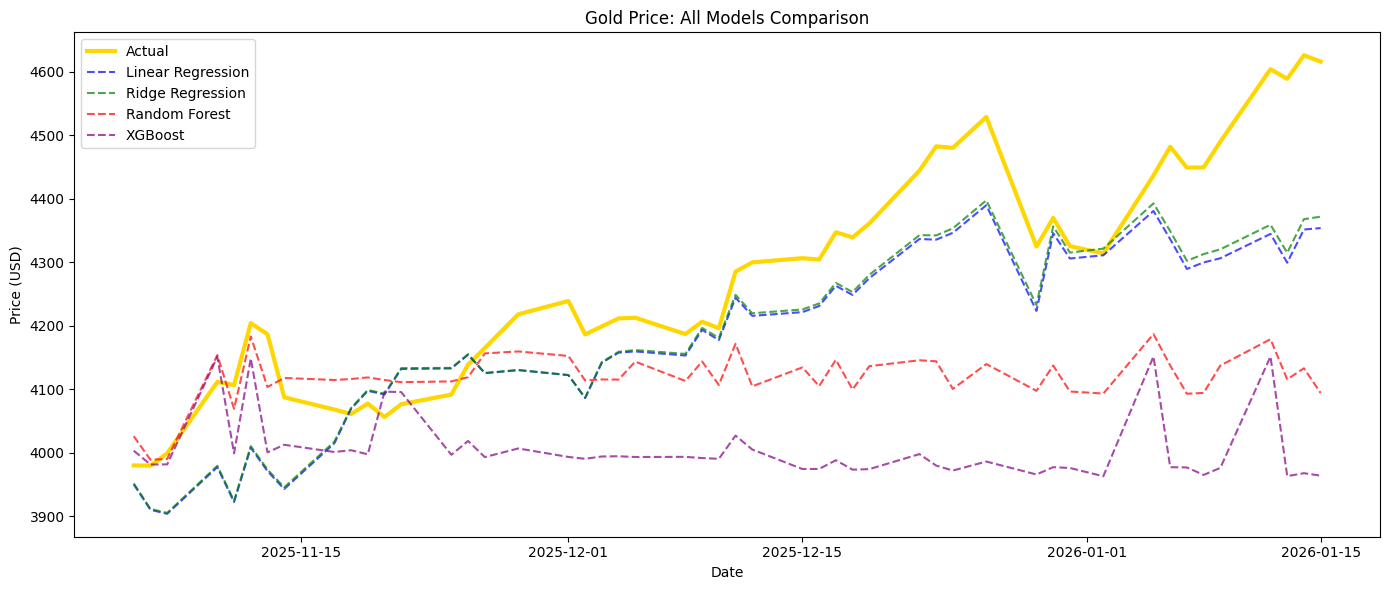

In [37]:
# Visualize Gold predictions from all models
plt.figure(figsize=(14, 6))
test_dates_gold = df_clean.index[-len(y_test_gold):]

plt.plot(test_dates_gold, y_test_gold.values, label='Actual', color='gold', linewidth=3)

colors = ['blue', 'green', 'red', 'purple']
for (name, y_pred), color in zip(gold_predictions.items(), colors):
    plt.plot(test_dates_gold, y_pred, label=name, linestyle='--', alpha=0.7, color=color)

plt.title('Gold Price: All Models Comparison')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

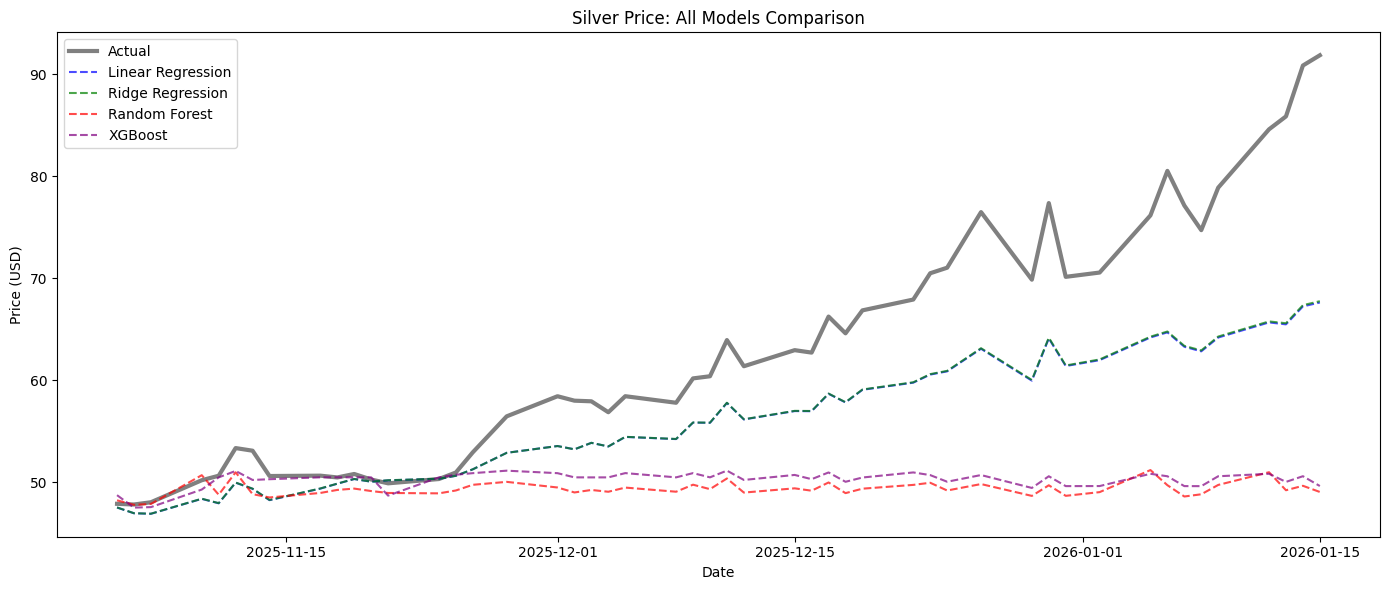

In [38]:
# Visualize Silver predictions from all models
plt.figure(figsize=(14, 6))
test_dates_silver = df_clean.index[-len(y_test_silver):]

plt.plot(test_dates_silver, y_test_silver.values, label='Actual', color='gray', linewidth=3)

colors = ['blue', 'green', 'red', 'purple']
for (name, y_pred), color in zip(silver_predictions.items(), colors):
    plt.plot(test_dates_silver, y_pred, label=name, linestyle='--', alpha=0.7, color=color)

plt.title('Silver Price: All Models Comparison')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

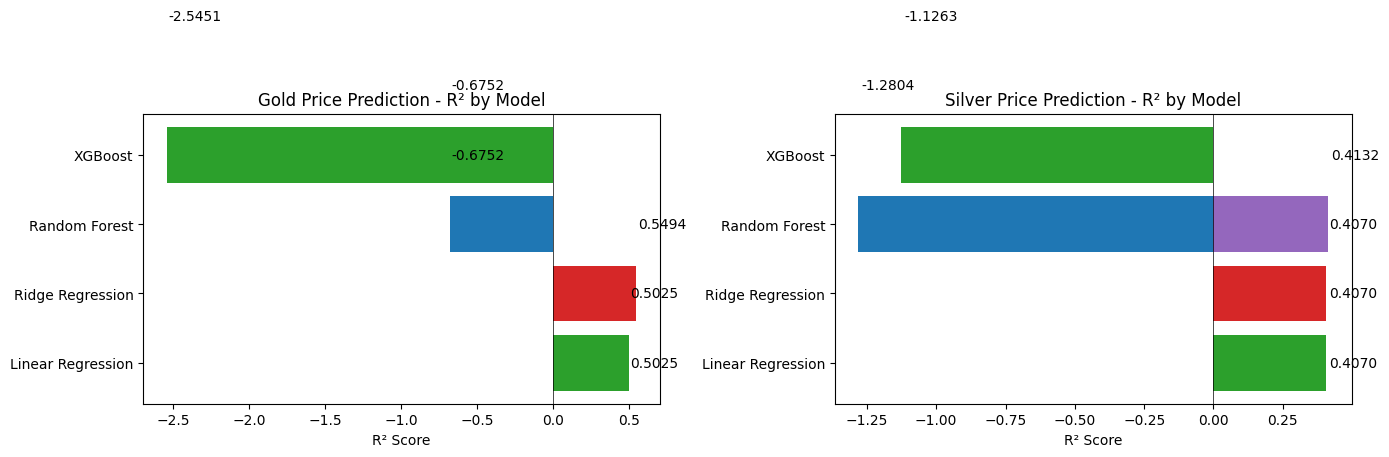

In [39]:
# Visual comparison of R² scores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gold R² comparison
models_list = gold_results_df['Model'].tolist()
gold_r2 = gold_results_df['R²'].tolist()
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd']

axes[0].barh(models_list, gold_r2, color=colors)
axes[0].set_xlabel('R² Score')
axes[0].set_title('Gold Price Prediction - R² by Model')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
for i, v in enumerate(gold_r2):
    axes[0].text(v + 0.01, i, f'{v:.4f}', va='center')

# Silver R² comparison
silver_r2 = silver_results_df['R²'].tolist()

axes[1].barh(models_list, silver_r2, color=colors)
axes[1].set_xlabel('R² Score')
axes[1].set_title('Silver Price Prediction - R² by Model')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
for i, v in enumerate(silver_r2):
    axes[1].text(v + 0.01, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()

In [40]:
# Find the best model for each asset
print("=" * 70)
print("BEST MODELS")
print("=" * 70)

# Best model for Gold (highest R²)
best_gold = gold_results_df.loc[gold_results_df['R²'].idxmax()]
print(f"\nBest model for GOLD: {best_gold['Model']}")
print(f"  R² Score: {best_gold['R²']:.4f}")
print(f"  RMSE: ${best_gold['RMSE ($)']:.2f}")
print(f"  MAPE: {best_gold['MAPE (%)']:.2f}%")
print(f"  CV RMSE (TimeSeriesSplit): ${best_gold['CV RMSE (TimeSeriesSplit)']:.2f}")

# Best model for Silver (highest R²)
best_silver = silver_results_df.loc[silver_results_df['R²'].idxmax()]
print(f"\nBest model for SILVER: {best_silver['Model']}")
print(f"  R² Score: {best_silver['R²']:.4f}")
print(f"  RMSE: ${best_silver['RMSE ($)']:.2f}")
print(f"  MAPE: {best_silver['MAPE (%)']:.2f}%")
print(f"  CV RMSE (TimeSeriesSplit): ${best_silver['CV RMSE (TimeSeriesSplit)']:.2f}")

BEST MODELS

Best model for GOLD: Ridge Regression
  R² Score: 0.5494
  RMSE: $117.95
  MAPE: 2.18%
  CV RMSE (TimeSeriesSplit): $97.72

Best model for SILVER: Ridge Regression
  R² Score: 0.4132
  RMSE: $9.26
  MAPE: 9.67%
  CV RMSE (TimeSeriesSplit): $2.78


## Summary

This project included:

1. **Download financial data** using yFinance
2. **Create features** like moving averages, returns, and volatility
3. **Visualize** price trends and patterns
4. **Train multiple machine learning models**:
   - Linear Regression
   - Ridge Regression
   - Random Forest
   - XGBoost
5. **Evaluate model performance** using:
   - RMSE (Root Mean Squared Error)
   - R² (R-squared)
   - MAPE (Mean Absolute Percentage Error)
   - TimeSeriesSplit Cross-Validation
6. **Compare models** for both Gold and Silver prices

**Key Metrics Explained:**
- **RMSE**: Average prediction error in dollars (lower is better)
- **R²**: How much of the price variation the model explains (closer to 1 is better)
- **MAPE**: Average percentage error (lower is better)
- **CV RMSE (TimeSeriesSplit)**: Cross-validated RMSE using time-aware splits (more robust estimate)